In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:
import gradio as gr

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np


In [ ]:

import keras.backend as K
from keras.utils import get_custom_objects

def dice_loss_plus_1focal_loss(y_true, y_pred):
    # custom loss function implementation
    pass



# Register the custom loss function
get_custom_objects().update({'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss})



In [ ]:

weights = [0.25, 0.25, 0.25, 0.25]
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

import keras.backend as K
from keras.utils import get_custom_objects

def dice_loss_plus_1focal_loss(y_true, y_pred):
    # custom loss function implementation
    pass

In [ ]:

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


In [ ]:

from keras.models import load_model

from keras.models import load_model
model = load_model('/content/unet_model_with_mio-83_30-04-2923.hdf5',
                   custom_objects={'dice_loss_plus_2focal_loss': total_loss,
                                   'jacard_coef':jacard_coef})




In [ ]:
image=Image.open('/content/sample_data/cropped_Bhattacharya_Frery_BF4_RGB.bmp.6000_4500.png_0_0.png')
image=np.array(image)
image=np.expand_dims(image, 0)

1/1 [==============================] - 1s 1s/step


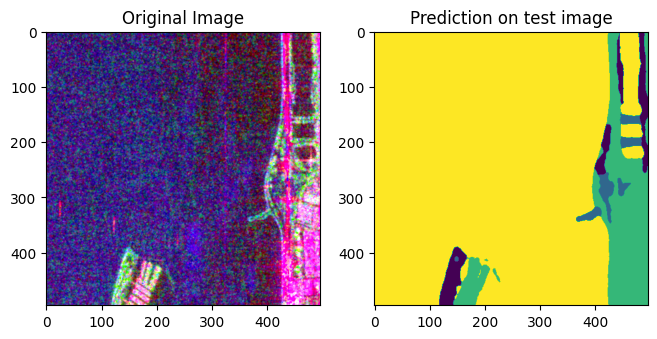

In [ ]:
prediction = model.predict(image)
predicted_img = np.argmax(prediction,axis=3)[0, :, :]

type(predicted_img)
# Plot images
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(Image.open('/content/sample_data/cropped_Bhattacharya_Frery_BF4_RGB.bmp.6000_4500.png_0_0.png'))
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

1/1 [==============================] - 1s 1s/step


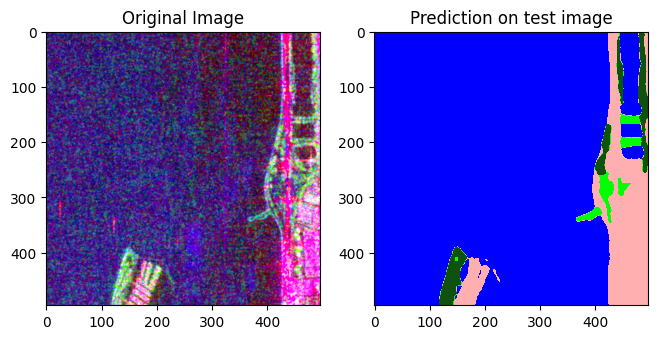

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define colors for each class (excluding background)
colors = [
    '#0f510d',  # class 1 (red)
    '#00ff00',  # class 2 (green)
    '#ffafaf',  # class 3 (pink)
    '#0000ff'   # class 4 (blue)
    # add more colors for additional classes...
]

# Load the original image and the predicted image
original_img = Image.open('/content/sample_data/cropped_Bhattacharya_Frery_BF4_RGB.bmp.6000_4500.png_0_0.png')
predicted_img = model.predict(image)  # assuming 'image' is the test image you want to predict

# Get the predicted class for each pixel
predicted_img = np.argmax(predicted_img, axis=-1)

# Create a color map using the colors list
cmap = mcolors.ListedColormap(colors)

# Plot the images
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(original_img)
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(predicted_img[0,:,:], cmap=cmap)

plt.show()


In [ ]:
model.get_config


In [ ]:
def process_input_image(image_source):
  image = np.expand_dims(image_source, 0)

  prediction = model.predict(image)
  predicted_image = np.argmax(prediction, axis=3)

  predicted_image = predicted_image[0,:,:]
  predicted_image = predicted_image * 50
  return 'Predicted Masked Image', predicted_image

In [ ]:
my_app = gr.Blocks()

In [ ]:
with my_app:
  gr.Markdown("Statellite Image Segmentation Application UI with Gradio")
  with gr.Tabs():
    with gr.TabItem("Select your image"):
      with gr.Row():
        with gr.Column():
            img_source = gr.Image(label="Please select source Image", shape=(496, 496))
            source_image_loader = gr.Button("Load above Image")
        with gr.Column():
            output_label = gr.Label(label="Image Info")
            img_output = gr.Image(label="Image Output")
    source_image_loader.click(
        process_input_image,
        [
            img_source
        ],
        [
            output_label,
            img_output
        ]
    )

In [ ]:
my_app.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 1s 1s/step
